In [63]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
from fuzzywuzzy import fuzz

In [64]:
df=pd.read_csv("final.csv")

In [65]:
df['total_runs'] = df.groupby(['id', 'batting_team'])['batsman_runs'].transform('sum')

In [66]:
print(df.Year.value_counts())

2023    21168
2022    17912
2020    14510
2019    14293
2018    14286
2016    14096
2017    13849
2015    13641
Name: Year, dtype: int64


In [67]:
df.shape

(123755, 14)

In [68]:
df.head()

,id,inning,over,ball,batsman,bowler,batsman_runs,is_wicket,venue,toss_decision,batting_team,bowling_team,Year,total_runs
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,0,0,"Narendra Modi Stadium, Ahmedabad",bat,Rajasthan Royals,Gujarat Titans,2022,252
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,0,0,"Narendra Modi Stadium, Ahmedabad",bat,Rajasthan Royals,Gujarat Titans,2022,252
2,1312200,1,0,3,JC Buttler,Mohammed Shami,1,0,"Narendra Modi Stadium, Ahmedabad",bat,Rajasthan Royals,Gujarat Titans,2022,252
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,0,0,"Narendra Modi Stadium, Ahmedabad",bat,Rajasthan Royals,Gujarat Titans,2022,252
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,0,0,"Narendra Modi Stadium, Ahmedabad",bat,Rajasthan Royals,Gujarat Titans,2022,252


In [69]:
df.describe()

,id,inning,over,ball,batsman_runs,is_wicket,Year,total_runs
count,1.237550e+05,123755.000000,123755.000000,123755.000000,123755.000000,123755.000000,123755.000000,123755.000000
mean,1.155811e+06,1.481936,9.235869,3.431255,1.306072,0.049444,2019.113789,189.689855
std,1.633610e+05,0.499676,5.689436,1.844094,1.672483,0.216795,2.737802,74.743471
min,8.297050e+05,1.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,2.000000
25%,1.082604e+06,1.000000,4.000000,2.000000,0.000000,0.000000,2017.000000,145.000000
50%,1.178400e+06,1.000000,9.000000,3.000000,1.000000,0.000000,2019.000000,166.000000
75%,1.304080e+06,2.000000,14.000000,5.000000,1.000000,0.000000,2022.000000,197.000000
max,1.370353e+06,2.000000,19.000000,10.000000,6.000000,1.000000,2023.000000,442.000000


<Axes: xlabel='total_runs'>

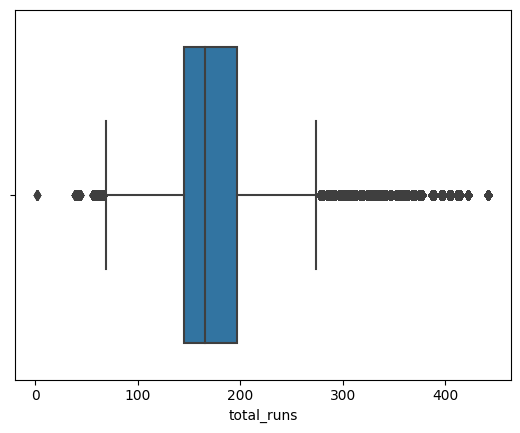

In [70]:
sns.boxplot(data=df,x='total_runs')

In [71]:
df = df[(df['total_runs'] > 48) & (df['total_runs'] < 258)]

<Axes: xlabel='total_runs'>

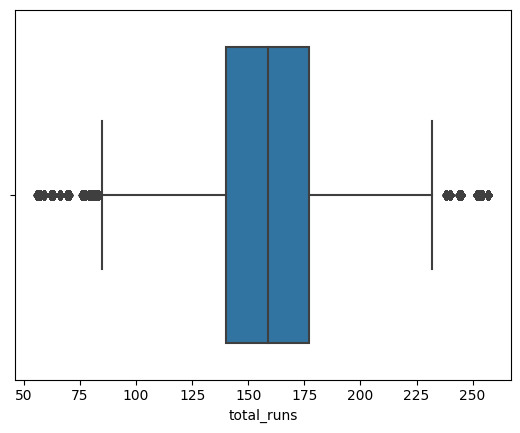

In [72]:
sns.boxplot(data=df,x='total_runs')

In [73]:
df.describe()

,id,inning,over,ball,batsman_runs,is_wicket,Year,total_runs
count,1.013380e+05,101338.000000,101338.000000,101338.000000,101338.000000,101338.000000,101338.000000,101338.000000
mean,1.119631e+06,1.481014,9.212487,3.456344,1.296651,0.049587,2018.416418,158.659979
std,1.585888e+05,0.499642,5.682134,1.835497,1.656780,0.217090,2.527976,31.334815
min,8.297050e+05,1.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,56.000000
25%,9.810010e+05,1.000000,4.000000,2.000000,0.000000,0.000000,2016.000000,140.000000
50%,1.136599e+06,1.000000,9.000000,3.000000,1.000000,0.000000,2018.000000,159.000000
75%,1.216516e+06,2.000000,14.000000,5.000000,1.000000,0.000000,2020.000000,177.000000
max,1.370353e+06,2.000000,19.000000,9.000000,6.000000,1.000000,2023.000000,257.000000


In [61]:
# The max value of ball is 11(in a single over), But we later convert the max value of balls to 6
df.isnull().sum()

id               0
inning           0
over             0
ball             0
batsman          0
bowler           0
batsman_runs     0
is_wicket        0
venue            0
toss_decision    0
batting_team     0
bowling_team     0
Year             0
total_runs       0
dtype: int64

In [62]:
# There is not a single null value in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103064 entries, 0 to 123754
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             103064 non-null  int64 
 1   inning         103064 non-null  int64 
 2   over           103064 non-null  int64 
 3   ball           103064 non-null  int64 
 4   batsman        103064 non-null  object
 5   bowler         103064 non-null  object
 6   batsman_runs   103064 non-null  int64 
 7   is_wicket      103064 non-null  int64 
 8   venue          103064 non-null  object
 9   toss_decision  103064 non-null  object
 10  batting_team   103064 non-null  object
 11  bowling_team   103064 non-null  object
 12  Year           103064 non-null  int64 
 13  total_runs     103064 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 11.8+ MB


In [76]:
df['batting_team'].value_counts()

Mumbai Indians                 12876
Sunrisers Hyderabad            12395
Kolkata Knight Riders          12049
Royal Challengers Bangalore    11714
Chennai Super Kings            10014
Kings XI Punjab                 9933
Rajasthan Royals                8608
Delhi Daredevils                6580
Delhi Capitals                  5239
Gujarat Lions                   3558
Rising Pune Supergiant          1900
Gujarat Titans                  1768
Rising Pune Supergiants         1580
Lucknow Super Giants            1571
Punjab Kings                    1553
Name: batting_team, dtype: int64

In [77]:
df['bowling_team'].value_counts()

Mumbai Indians                 13388
Sunrisers Hyderabad            12313
Royal Challengers Bangalore    12167
Kolkata Knight Riders          11817
Kings XI Punjab                 9923
Chennai Super Kings             9459
Rajasthan Royals                8317
Delhi Daredevils                6392
Delhi Capitals                  5434
Gujarat Lions                   3540
Gujarat Titans                  2263
Rising Pune Supergiant          1928
Rising Pune Supergiants         1615
Lucknow Super Giants            1452
Punjab Kings                    1330
Name: bowling_team, dtype: int64

In [78]:
df['batting_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
df['bowling_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)

In [79]:
df['bowling_team'].value_counts()

Mumbai Indians                 13388
Sunrisers Hyderabad            12313
Royal Challengers Bangalore    12167
Kolkata Knight Riders          11817
Kings XI Punjab                 9923
Chennai Super Kings             9459
Rajasthan Royals                8317
Delhi Daredevils                6392
Delhi Capitals                  5434
Rising Pune Supergiants         3543
Gujarat Lions                   3540
Gujarat Titans                  2263
Lucknow Super Giants            1452
Punjab Kings                    1330
Name: bowling_team, dtype: int64

In [173]:
# There are 4 columns with catagorical values, later we convert them into numericals


In [174]:
# Replacing the balls greater than 6 to a random number between 1-6
for i in df['ball']:
    if i>6:
        df['ball'].replace(i,random.randint(1,6),inplace=True)


In [175]:
# Converting the object data type of toss_decision column to boolean values by bat as true and field as false
df['toss_decision']=df['toss_decision']=='bat'

In [176]:
# There are same players and venues repeated with diffrend names, we need to replace those similar names using fuzzywuuzy library
def find_similar_names(names_list, similarity_threshold=80):
    name_dict = {}
    similar_names = set()

    for name in names_list:
        if name in similar_names:
            continue
        similar_names.add(name)
        similar_names_list = [name]
        for i in names_list:
            if i != name:
                similarity_score = fuzz.ratio(name, i)
                if similarity_score >= similarity_threshold:
                    similar_names.add(i)
                    similar_names_list.append(i)
        if len(similar_names_list) > 1:
            name_dict[name] = similar_names_list

    return name_dict

In [177]:
# For vanue
v=sorted(df['venue'].unique())
dict_venue=find_similar_names(v, similarity_threshold=75)
# Print the dictionary
for key, value in dict_venue.items():
    print(key, ':', value)

Brabourne Stadium : ['Brabourne Stadium', 'Brabourne Stadium, Mumbai']
Holkar Cricket Stadium : ['Holkar Cricket Stadium', 'Sharjah Cricket Stadium']
M Chinnaswamy Stadium : ['M Chinnaswamy Stadium', 'M Chinnaswamy Stadium, Bengaluru', 'M.Chinnaswamy Stadium']
MA Chidambaram Stadium, Chepauk : ['MA Chidambaram Stadium, Chepauk', 'MA Chidambaram Stadium, Chepauk, Chennai']
Maharashtra Cricket Association Stadium : ['Maharashtra Cricket Association Stadium', 'Maharashtra Cricket Association Stadium, Pune', 'Saurashtra Cricket Association Stadium']
Punjab Cricket Association IS Bindra Stadium, Mohali : ['Punjab Cricket Association IS Bindra Stadium, Mohali', 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh', 'Punjab Cricket Association Stadium, Mohali']
Rajiv Gandhi International Stadium, Uppal : ['Rajiv Gandhi International Stadium, Uppal', 'Rajiv Gandhi International Stadium, Uppal, Hyderabad']
Sawai Mansingh Stadium : ['Sawai Mansingh Stadium', 'Sawai Mansingh Stadium,

In [178]:
# making some manuel changes
dict_venue['MA Chidambaram Stadium']=['MA Chidambaram Stadium, Chepauk, Chennai',"MA Chidambaram Stadium, Chepauk"]
dict_venue['Eden Gardens']=['Eden Gardens, Kolkata']
dict_venue['Narendra Modi Stadium']=['Narendra Modi Stadium, Ahmedabad']
dict_venue['Arun Jaitley Stadium']=['Arun Jaitley Stadium, Delhi']
del (dict_venue['Holkar Cricket Stadium'])

In [179]:
for key,value in dict_venue.items():
    for i in value:
        df["venue"].replace(i,key,inplace=True)

In [180]:
sorted(df['venue'].unique())

['Arun Jaitley Stadium',
 'Barsapara Cricket Stadium, Guwahati',
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
 'Brabourne Stadium',
 'Dr DY Patil Sports Academy, Mumbai',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Feroz Shah Kotla',
 'Green Park',
 'Himachal Pradesh Cricket Association Stadium, Dharamsala',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium',
 'Maharashtra Cricket Association Stadium',
 'Narendra Modi Stadium',
 'Punjab Cricket Association IS Bindra Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 'Wankhede Stadium']

In [181]:
# For players
b=sorted(df['batsman'].unique())
dict_bat=find_similar_names(b, similarity_threshold=75)
print(dict_bat)

{'AN Ahmed': ['AN Ahmed', 'KK Ahmed'], 'AR Patel': ['AR Patel', 'HV Patel', 'MM Patel', 'PA Patel', 'RV Patel'], 'Anmolpreet Singh': ['Anmolpreet Singh', 'Anureet Singh'], 'B Kumar': ['B Kumar', 'P Kumar'], 'DJ Bravo': ['DJ Bravo', 'DM Bravo'], 'DJM Short': ['DJM Short', 'MW Short'], 'DL Chahar': ['DL Chahar', 'RD Chahar'], 'DR Smith': ['DR Smith', 'OF Smith', 'SPD Smith'], 'Gurkeerat Singh': ['Gurkeerat Singh', 'Anureet Singh'], 'HH Pandya': ['HH Pandya', 'KH Pandya'], 'Harpreet Singh': ['Harpreet Singh', 'Simarjeet Singh'], 'I Sharma': ['I Sharma', 'JM Sharma', 'KS Sharma', 'KV Sharma', 'MM Sharma', 'RG Sharma'], 'IK Pathan': ['IK Pathan', 'YK Pathan'], 'J Yadav': ['J Yadav', 'SA Yadav', 'UT Yadav'], 'JA Morkel': ['JA Morkel', 'M Morkel'], 'K Kartikeya': ['K Kartikeya', 'KD Karthik'], 'KJ Abbott': ['KJ Abbott', 'SA Abbott'], 'KS Bharat': ['KS Bharat', 'KS Sharma'], 'M Ashwin': ['M Ashwin', 'R Ashwin'], 'MK Pandey': ['MK Pandey', 'KH Pandya'], 'MK Tiwary': ['MK Tiwary', 'SS Tiwary'], 

In [182]:
# making some manuel changes
for i in ["batsman","bowler"]:
    df[i].replace('RV Patel','Ripal Patel',inplace=True)
    df[i].replace('HV Patel','Harshal Patel',inplace=True)
    df[i].replace('AR Patel','Axar Patel',inplace=True)
    df[i].replace('BA Stokes','Ben Stokes',inplace=True)
    df[i].replace('CR Woakes','Chris Woakes',inplace=True)
    df[i].replace('DA Warner','David Warner',inplace=True)
    df[i].replace('E Lewis','Evin Lewis',inplace=True)
    df[i].replace('HH Pandya','Hardik Pandya',inplace=True)
    df[i].replace('KH Pandya','Krunal Pandya',inplace=True)
    df[i].replace('I Sharma','Ishant Sharma',inplace=True)
    df[i].replace('JM Sharma','Jitesh Sharma',inplace=True)
    df[i].replace('MM Sharma','Mohit Sharma',inplace=True)
    df[i].replace('RG Sharma','Rohit Sharma',inplace=True)
    df[i].replace('YK Pathan','Yusuf Pathan',inplace=True)
    df[i].replace('IK Pathan','Irfan Pathan',inplace=True)
    df[i].replace('UT Yadav','Umesh Yadav',inplace=True)
    df[i].replace('J Yadav','Jayant Yadav',inplace=True)
    df[i].replace('SA Yadav','Suryakumar Yadav',inplace=True)
    df[i].replace('JC Buttler','Jos Buttler',inplace=True)
    df[i].replace('JDS Neesham','JD Neesham',inplace=True)
    df[i].replace('JD Unadkat','Jaydev Unadkat',inplace=True)
    df[i].replace('JO Holder','Jason Holder',inplace=True)
    df[i].replace('KA Pollard','Kieron Pollard',inplace=True)
    df[i].replace('M Shahrukh Khan','Shahrukh Khan',inplace=True)
    df[i].replace('M Shami','Mohammed Shami',inplace=True)
    df[i].replace('MC Henriques','Moises Henriques',inplace=True)
    df[i].replace('S Dube','S Dubey',inplace=True)
    df[i].replace('WP Saha','Wriddhiman Saha',inplace=True)
    df[i].replace('PJ Cummins','Pat Cummins',inplace=True)
    df[i].replace('SN Khan','Sarfaraz Khan',inplace=True)
    df[i].replace('TH David','Tim David',inplace=True)
    df[i].replace('V Kohli','Virat Kohli',inplace=True)
    df[i].replace('V Shankar','Vijay Shankar',inplace=True)
    df[i].replace('MR Marsh','Mitchell Marsh',inplace=True)
    df[i].replace('CJ Green','C Green',inplace=True)
    df[i].replace('GD Phillips','Glenn Phillips',inplace=True)
    df[i].replace('JR Hazlewood','Josh Hazlewood',inplace=True)
    df[i].replace('Mohsin Khan (2)','Mohsin Khan',inplace=True)
    df[i].replace('Arshad Khan (2)','Arshad Khan',inplace=True)

# Now we need to numerical encoding of batsman,bowler and venue

# For vanue we rank them based on their size from an external sources

stadium_size = {
    'Arun Jaitley Stadium': 16,
    'Barsapara Cricket Stadium, Guwahati': 12,
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 13,
    'Brabourne Stadium': 4,
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 11,
    'Dubai International Cricket Stadium': 10,
    'Eden Gardens': 25,
    'Feroz Shah Kotla': 14,
    'Green Park': 15,
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 9,
    'Holkar Cricket Stadium': 8,
    'JSCA International Stadium Complex': 17,
    'M Chinnaswamy Stadium': 18,
    'MA Chidambaram Stadium': 19,
    'Maharashtra Cricket Association Stadium': 20,
    'Narendra Modi Stadium': 27,
    'Dr DY Patil Sports Academy, Mumbai':21,
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 6,
    'Rajiv Gandhi International Stadium, Uppal': 19,
    'Sardar Patel Stadium, Motera': 23,
    'Saurashtra Cricket Association Stadium': 7,
    'Sawai Mansingh Stadium': 5,
    'Shaheed Veer Narayan Singh International Stadium': 24,
    'Sharjah Cricket Stadium': 2,
    'Sheikh Zayed Stadium': 3,
    'Wankhede Stadium': 22
}

In [183]:
# Now we replace the venue with the corresponding size value
df['venue_encoded']=df['venue']
for i,j in stadium_size.items():
    df['venue_encoded'].replace(i,j,inplace=True)


In [184]:
# Encoding batsman column

# Calculate the total runs for each "batsman"
sum_runs = df.groupby('batsman')['batsman_runs'].sum()

In [185]:
# Calculate the total wickets for each "batsman"
sum_wickets=df.groupby('batsman')['is_wicket'].sum()
     
batsman_constant=dict(round(sum_runs/(sum_wickets+1),2))

In [186]:
# To unique identification of batsman
batsman_encoder={}
for k in range(len(batsman_constant)):
    for i,j in batsman_constant.items():
        if j==min(batsman_constant.values()):
            batsman_encoder[i]=k
            del batsman_constant[i]
            break


print(batsman_encoder)

{'DG Nalkande': 0, 'JL Denly': 1, 'KK Ahmed': 2, 'KM Asif': 3, 'KR Sen': 4, 'MM Patel': 5, 'Mohsin Khan (2)': 6, 'R Sanjay Yadav': 7, 'RP Meredith': 8, 'S Kaushik': 9, 'S Lamichhane': 10, 'SS Cottrell': 11, 'Y Prithvi Raj': 12, 'Yash Dayal': 13, 'NT Ellis': 14, 'Yudhvir Singh': 15, 'B Laughlin': 16, 'DJ Muthuswami': 17, 'LE Plunkett': 18, 'A Nehra': 19, 'Harshit Rana': 20, 'AJ Turner': 21, 'S Kaul': 22, 'PJ Sangwan': 23, 'Abdul Basith': 24, 'BE Hendricks': 25, 'GC Viljoen': 26, 'HF Gurney': 27, 'J Theron': 28, 'KW Richardson': 29, 'Navdeep Saini': 30, 'SB Jakati': 31, 'WD Parnell': 32, 'TS Mills': 33, 'AF Milne': 34, 'A Tomar': 35, 'C Sakariya': 36, 'CM Gautam': 37, 'Liton Das': 38, 'Mohit Rathee': 39, 'NJ Maddinson': 40, 'RG More': 41, 'S Badree': 42, 'Ankit Soni': 43, 'IS Sodhi': 44, 'RK Bhui': 45, 'A Zampa': 46, 'Mustafizur Rahman': 47, 'Z Khan': 48, 'KS Bharat': 49, 'Noor Ahmad': 50, 'Kartik Tyagi': 51, 'Mujeeb Ur Rahman': 52, 'M Ashwin': 53, 'Azhar Mahmood': 54, 'Fazalhaq Farooqi'

In [187]:
# Ecoding using batsman_encoder
df['batsman_encoded']=df['batsman']
for i,j in batsman_encoder.items():
    df['batsman_encoded'].replace(i,j,inplace=True)



In [188]:
# Calculate the total balls by each "bowler"
sum_balls = df['bowler'].value_counts()



In [189]:
# Calculate the total wickets for each "bowler"
sum_wickets = df.groupby('bowler')['is_wicket'].sum()
     
bowler_constant = dict(round(sum_balls/300+(sum_wickets+1),2))


bowler_encoder={}
for k in range(len(bowler_constant)):
    for i,j in bowler_constant.items():
        if j==min(bowler_constant.values()):
            bowler_encoder[i]=k
            del bowler_constant[i]
            break



In [190]:
print(bowler_encoder)

# Ecoding using bowler_encoder
df['bowler_encoded']=df['bowler']
for i,j in bowler_encoder.items():
    df['bowler_encoded'].replace(i,j,inplace=True)



{'YBK Jaiswal': 0, 'David Warner': 1, 'Sarfaraz Khan': 2, 'Aman Hakim Khan': 3, 'GH Vihari': 4, 'MK Tiwary': 5, 'RA Tripathi': 6, 'SS Iyer': 7, 'C Munro': 8, 'DJ Mitchell': 9, 'JE Root': 10, 'Mandeep Singh': 11, 'PP Ojha': 12, 'S Ladda': 13, 'S Midhun': 14, 'Shashank Singh': 15, 'MS Gony': 16, 'Monu Kumar': 17, 'R Sanjay Yadav': 18, 'CJ Dala': 19, 'DJG Sammy': 20, 'H Sharma': 21, 'KS Williamson': 22, 'MN Samuels': 23, 'Tilak Varma': 24, 'Gurnoor Brar': 25, 'Tejas Baroka': 26, 'A Dananjaya': 27, 'Mohit Rathee': 28, 'P Ray Barman': 29, 'VR Iyer': 30, 'M Vijay': 31, 'Nithish Kumar Reddy': 32, 'MW Short': 33, 'Vivrant Sharma': 34, 'R Goyal': 35, 'Rasikh Salam': 36, 'KR Mayers': 37, 'P Suyal': 38, 'D Brevis': 39, 'RN ten Doeschate': 40, 'RJW Topley': 41, 'DJM Short': 42, 'Shivam Sharma': 43, 'Virat Kohli': 44, 'Azhar Mahmood': 45, 'R Powell': 46, 'FA Allen': 47, 'NB Singh': 48, 'SS Agarwal': 49, 'Duan Jansen': 50, 'J Theron': 51, 'M de Lange': 52, 'Y Prithvi Raj': 53, 'RG More': 54, 'SSB Ma

In [191]:
df.duplicated().sum()

599

In [192]:
df.drop_duplicates(inplace=True)

In [193]:
df.duplicated().sum()

0

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123265 entries, 0 to 123754
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               123265 non-null  int64 
 1   inning           123265 non-null  int64 
 2   over             123265 non-null  int64 
 3   ball             123265 non-null  int64 
 4   batsman          123265 non-null  object
 5   bowler           123265 non-null  object
 6   batsman_runs     123265 non-null  int64 
 7   is_wicket        123265 non-null  int64 
 8   venue            123265 non-null  object
 9   toss_decision    123265 non-null  bool  
 10  batting_team     123265 non-null  object
 11  bowling_team     123265 non-null  object
 12  Year             123265 non-null  int64 
 13  venue_encoded    123265 non-null  int64 
 14  batsman_encoded  123265 non-null  int64 
 15  bowler_encoded   123265 non-null  int64 
dtypes: bool(1), int64(10), object(5)
memory usage: 15.2+ MB


In [162]:
df.to_csv("processed.csv",index=False)